# PREDICTION USING UNSUPERVISED ML

## Task: 
***From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually***

**Author:** Jaweria Niaz Mughal

### STEP-01: Importing and Analyzing dataset

In [8]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# Importing dataset
data = datasets.load_iris()
dataset = pd.DataFrame(data.data, columns = data.feature_names)
print("Data Imported Successfully!")
dataset.head()

Data Imported Successfully!


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### STEP-02: Finding Optimal Number of Clusters

We use ***Elbow Method*** to find optimal number of clusters in our dataset

Text(0, 0.5, 'WCSS')

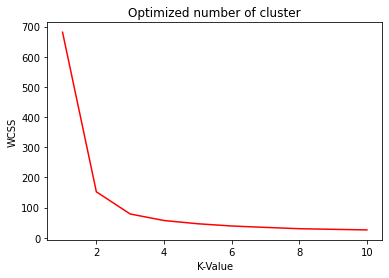

In [6]:
# Separating features
x = dataset.iloc[:, 0:].values

# Importing K-Means
from sklearn.cluster import KMeans
WCSS = []


# Finding optimal number of clusters between 1-10
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)

    
# Visualizing the optimization graph
plt.plot(range(1,11), WCSS, color='red')
plt.title("Optimized number of cluster")
plt.xlabel("K-Value")
plt.ylabel("WCSS")

From above graph, we can easily get an idea that optimal number of clusters = ***3***

### STEP-03: Train the Model

In [9]:
# To train the k-mean model, we'll use k=3 as defined above
model = KMeans(n_clusters=3, init='k-means++', random_state=42)
y = model.fit_predict(x)
print("Training is successfully completed!")

Training is successfully completed!


### STEP-04: Visualizing the resultant clusters

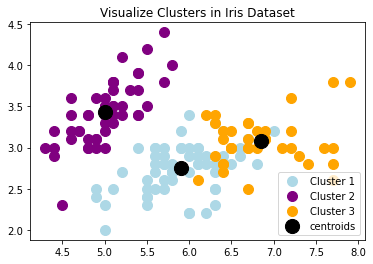

In [19]:
# Visualization clusters
plt.scatter(x[y == 0, 0], x[y == 0, 1], s=100, c='lightblue', label='Cluster 1')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s=100, c='purple', label='Cluster 2')
plt.scatter(x[y == 2, 0], x[y == 2, 1], s=100, c='orange', label='Cluster 3')

# Visualizing the centroids
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=200, c='black', label='centroids')
plt.title("Visualize Clusters in Iris Dataset")
plt.legend()